In [220]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from itertools import combinations
import math

In [221]:
x = np.append(np.append(np.random.normal(loc=1, scale=1, size=50), np.random.normal(loc=6, scale=1, size=50)), np.random.normal(loc=10, scale=1, size=50))
y = np.append(np.append(np.random.normal(loc=1, scale=1, size=50), np.random.normal(loc=3, scale=1, size=50)), np.random.normal(loc=8, scale=1, size=50))

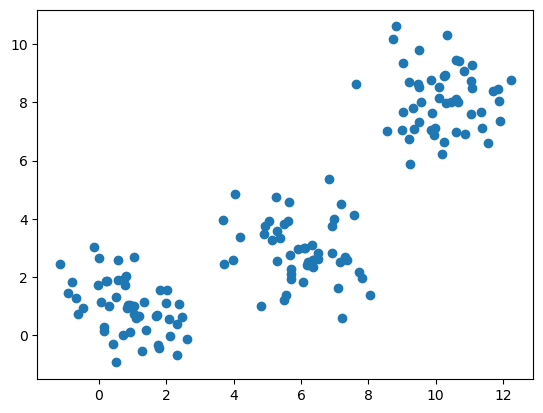

In [222]:
# Построение
plt.scatter(x, y)
plt.show()

In [223]:
# Количество кластеров
c = 3

# Экспоненциальный вес
m = 2.

# Параметр останова алгоритма
eps = 0.01

In [224]:
F = np.random.rand(150, c)
for i in range(150):
    for j in range(c):
        F[i][j] = F[i][j] / np.sum(F[i])


In [225]:
V_x = np.random.rand(3)
V_y = np.random.rand(3)
for i in range(c):
    res_t_x = res_t_y = 0.
    res_b = 0.
    for k in range(150):
        res_b += pow(F[k][i], m)
        res_t_x += pow(F[k][i], m) * x[k]
        res_t_y += pow(F[k][i], m) * y[k]
    V_x[i] = res_t_x / res_b
    V_y[i] = res_t_y / res_b

In [226]:
V_x, V_y

(array([5.82908211, 5.71686372, 5.8392813 ]),
 array([4.27037406, 3.93942544, 3.92110431]))

In [227]:
D = np.random.rand(150, c)
for k in range(150):
    for i in range(c):
        D[k][i] = math.sqrt(pow(x[k] - V_x[i], 2) + pow(y[k] - V_y[i], 2))

In [228]:
for k in range(150):
    for i in range(c):
        Sum = 0.
        for j in range(c):
            Sum += 1 / pow(D[k][j], 2)
        F[k][i] = 1 / pow(pow(D[k][i], 2) * Sum, 1 / (m - 1))

In [229]:
V_new_x = np.random.rand(3)
V_new_y = np.random.rand(3)
for i in range(c):
    res_t_x = res_t_y = 0.
    res_b = 0.
    for k in range(150):
        res_b += pow(F[k][i], m)
        res_t_x += pow(F[k][i], m) * x[k]
        res_t_y += pow(F[k][i], m) * y[k]
    V_new_x[i] = res_t_x / res_b
    V_new_y[i] = res_t_y / res_b

In [230]:
count = 0
while True:
    count += 1
    V_x = V_new_x.copy()
    V_y = V_new_y.copy()

    for k in range(150):
        for i in range(c):
            D[k][i] = math.sqrt(pow(x[k] - V_x[i], 2) + pow(y[k] - V_y[i], 2))
    
    for k in range(150):
        for i in range(c):
            Sum = 0.
            for j in range(c):
                Sum += 1 / pow(D[k][j], 2)
            F[k][i] = 1 / pow(pow(D[k][i], 2) * Sum, 1 / (m - 1))

    for i in range(c):
        res_t_x = res_t_y = 0.
        res_b = 0.
        for k in range(150):
            res_b += pow(F[k][i], m)
            res_t_x += pow(F[k][i], m) * x[k]
            res_t_y += pow(F[k][i], m) * y[k]
        V_new_x[i] = res_t_x / res_b
        V_new_y[i] = res_t_y / res_b

    cond = 0.
    for i in range(c):
        cond += math.sqrt(pow(V_new_x[i] - V_x[i], 2.) + pow(V_new_y[i] - V_y[i], 2.))

    if (cond < eps):
        break

9


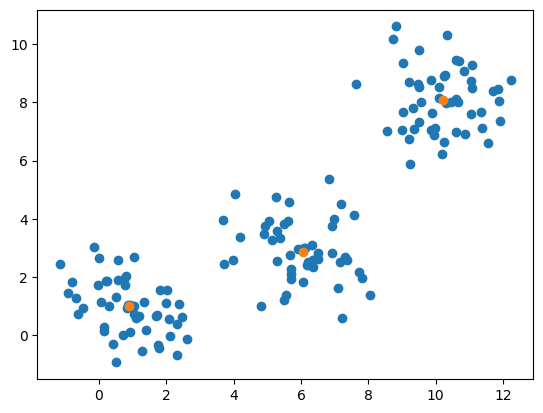

In [231]:
print(count + 1)
plt.scatter(x, y)
plt.scatter(V_new_x, V_new_y)
plt.show()

In [232]:
F

array([[4.75523990e-03, 9.76788310e-01, 1.84564497e-02],
       [1.71241106e-02, 8.79414276e-01, 1.03461614e-01],
       [8.14609842e-03, 9.59640167e-01, 3.22137349e-02],
       [2.50704373e-03, 9.87359921e-01, 1.01330357e-02],
       [8.14397964e-03, 9.59682536e-01, 3.21734844e-02],
       [6.64853840e-03, 9.65199133e-01, 2.81523290e-02],
       [2.32104726e-02, 8.91970332e-01, 8.48191951e-02],
       [1.74627162e-03, 9.90898206e-01, 7.35552241e-03],
       [6.99710654e-05, 9.99616367e-01, 3.13661906e-04],
       [5.65210780e-03, 9.63956222e-01, 3.03916702e-02],
       [2.22517343e-02, 8.77511714e-01, 1.00236551e-01],
       [1.31785282e-02, 9.06279678e-01, 8.05417940e-02],
       [9.47633525e-03, 9.34549390e-01, 5.59742748e-02],
       [1.65620746e-04, 9.99056307e-01, 7.78071754e-04],
       [3.96178282e-03, 9.78503072e-01, 1.75351454e-02],
       [1.28851281e-02, 9.42088994e-01, 4.50258783e-02],
       [7.13341821e-06, 9.99960265e-01, 3.26018984e-05],
       [6.54492864e-03, 9.67989